LINEAR REGRESSION
=================
Linear Regression is the simplest form of regression that fits a straight line
to the data by minimizing the sum of squared residuals (errors).

Formula: y = β0 + β1*x1 + β2*x2 + ... + βn*xn

No regularization is applied, so the model tries to fit the training data as
closely as possible, which may lead to overfitting on complex datasets.

In [1]:
# ============================================
# IMPORT LIBRARIES
# ============================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
# ============================================
# LOAD AND EXPLORE DATASET
# ============================================
print("=" * 70)
print("LINEAR REGRESSION - California Housing Dataset")
print("=" * 70)

LINEAR REGRESSION - California Housing Dataset


In [4]:
# Load California Housing dataset
# This dataset contains 8 features like median income, house age, etc.
# Target: Median house value in $100,000s
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='MedHouseValue')

print("\n1. DATASET OVERVIEW")
print("-" * 70)
print(f"Dataset shape: {X.shape}")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"\nFeature names:\n{list(X.columns)}")



1. DATASET OVERVIEW
----------------------------------------------------------------------
Dataset shape: (20640, 8)
Number of samples: 20640
Number of features: 8

Feature names:
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [5]:
# Display first few rows
print(f"\nFirst 5 rows of data:")
print(X.head())
print(f"\nTarget statistics:")
print(y.describe())


First 5 rows of data:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

Target statistics:
count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseValue, dtype: float64


In [6]:
# ============================================
# DATA PREPROCESSING
# ============================================
print("\n2. DATA PREPROCESSING")
print("-" * 70)

# Split data into training and testing sets (80-20 split)
# random_state ensures reproducibility across all files
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


2. DATA PREPROCESSING
----------------------------------------------------------------------
Training set size: 16512 samples
Testing set size: 4128 samples


In [7]:
# Feature Scaling using StandardScaler
# Scaling is important for better model performance and faster convergence
# Formula: z = (x - mean) / std_deviation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data
X_test_scaled = scaler.transform(X_test)        # Transform test data using training stats

print(f"\nFeatures scaled using StandardScaler")
print(f"Sample mean before scaling: {X_train.mean().mean():.4f}")
print(f"Sample mean after scaling: {X_train_scaled.mean():.4f}")
print(f"Sample std before scaling: {X_train.std().mean():.4f}")
print(f"Sample std after scaling: {X_train_scaled.std():.4f}")



Features scaled using StandardScaler
Sample mean before scaling: 173.0790
Sample mean after scaling: 0.0000
Sample std before scaling: 146.2631
Sample std after scaling: 1.0000


In [8]:
# ============================================
# MODEL TRAINING
# ============================================
print("\n3. MODEL TRAINING")
print("-" * 70)

# Initialize Linear Regression model
# Linear Regression uses Ordinary Least Squares (OLS) method
# It minimizes: RSS = Σ(yi - ŷi)²
model = LinearRegression()

# Fit the model on training data
# This calculates the optimal coefficients (weights) for each feature
model.fit(X_train_scaled, y_train)

print("✓ Model trained successfully!")
print(f"\nModel intercept (β0): {model.intercept_:.4f}")
print(f"\nModel coefficients (β1, β2, ..., βn):")

# Display coefficients with feature names
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)
print(coef_df.to_string(index=False))




3. MODEL TRAINING
----------------------------------------------------------------------
✓ Model trained successfully!

Model intercept (β0): 2.0719

Model coefficients (β1, β2, ..., βn):
   Feature  Coefficient
  Latitude    -0.896929
 Longitude    -0.869842
    MedInc     0.854383
 AveBedrms     0.339259
  AveRooms    -0.294410
  HouseAge     0.122546
  AveOccup    -0.040829
Population    -0.002308


In [9]:
# ============================================
# PREDICTIONS
# ============================================
print("\n4. MAKING PREDICTIONS")
print("-" * 70)

# Predict on training set
y_train_pred = model.predict(X_train_scaled)

# Predict on testing set
y_test_pred = model.predict(X_test_scaled)

print("✓ Predictions completed")
print(f"\nSample predictions vs actual (first 5 test samples):")
comparison_df = pd.DataFrame({
    'Actual': y_test.values[:5],
    'Predicted': y_test_pred[:5],
    'Difference': y_test.values[:5] - y_test_pred[:5]
})
print(comparison_df.to_string(index=False))


4. MAKING PREDICTIONS
----------------------------------------------------------------------
✓ Predictions completed

Sample predictions vs actual (first 5 test samples):
 Actual  Predicted  Difference
0.47700   0.719123   -0.242123
0.45800   1.764017   -1.306017
5.00001   2.709659    2.290351
2.18600   2.838926   -0.652926
2.78000   2.604657    0.175343


In [10]:
# ============================================
# MODEL EVALUATION
# ============================================
print("\n5. MODEL EVALUATION")
print("-" * 70)

# Calculate metrics for training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for testing set
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("TRAINING SET METRICS:")
print(f"  Mean Squared Error (MSE):  {train_mse:.4f}")
print(f"  Root Mean Squared Error:   {train_rmse:.4f}")
print(f"  Mean Absolute Error (MAE): {train_mae:.4f}")
print(f"  R² Score:                  {train_r2:.4f}")

print("\nTESTING SET METRICS:")
print(f"  Mean Squared Error (MSE):  {test_mse:.4f}")
print(f"  Root Mean Squared Error:   {test_rmse:.4f}")
print(f"  Mean Absolute Error (MAE): {test_mae:.4f}")
print(f"  R² Score:                  {test_r2:.4f}")

# Check for overfitting
# If training R² >> testing R², the model is overfitting
print(f"\nOverfitting Check:")
print(f"  R² difference (Train - Test): {train_r2 - test_r2:.4f}")
if train_r2 - test_r2 > 0.1:
    print("  ⚠ Warning: Model may be overfitting!")
else:
    print("  ✓ Model is generalizing well")


5. MODEL EVALUATION
----------------------------------------------------------------------
TRAINING SET METRICS:
  Mean Squared Error (MSE):  0.5179
  Root Mean Squared Error:   0.7197
  Mean Absolute Error (MAE): 0.5286
  R² Score:                  0.6126

TESTING SET METRICS:
  Mean Squared Error (MSE):  0.5559
  Root Mean Squared Error:   0.7456
  Mean Absolute Error (MAE): 0.5332
  R² Score:                  0.5758

Overfitting Check:
  R² difference (Train - Test): 0.0368
  ✓ Model is generalizing well



6. VISUALIZATIONS
----------------------------------------------------------------------
✓ Visualizations saved as 'linear_regression_analysis.png'


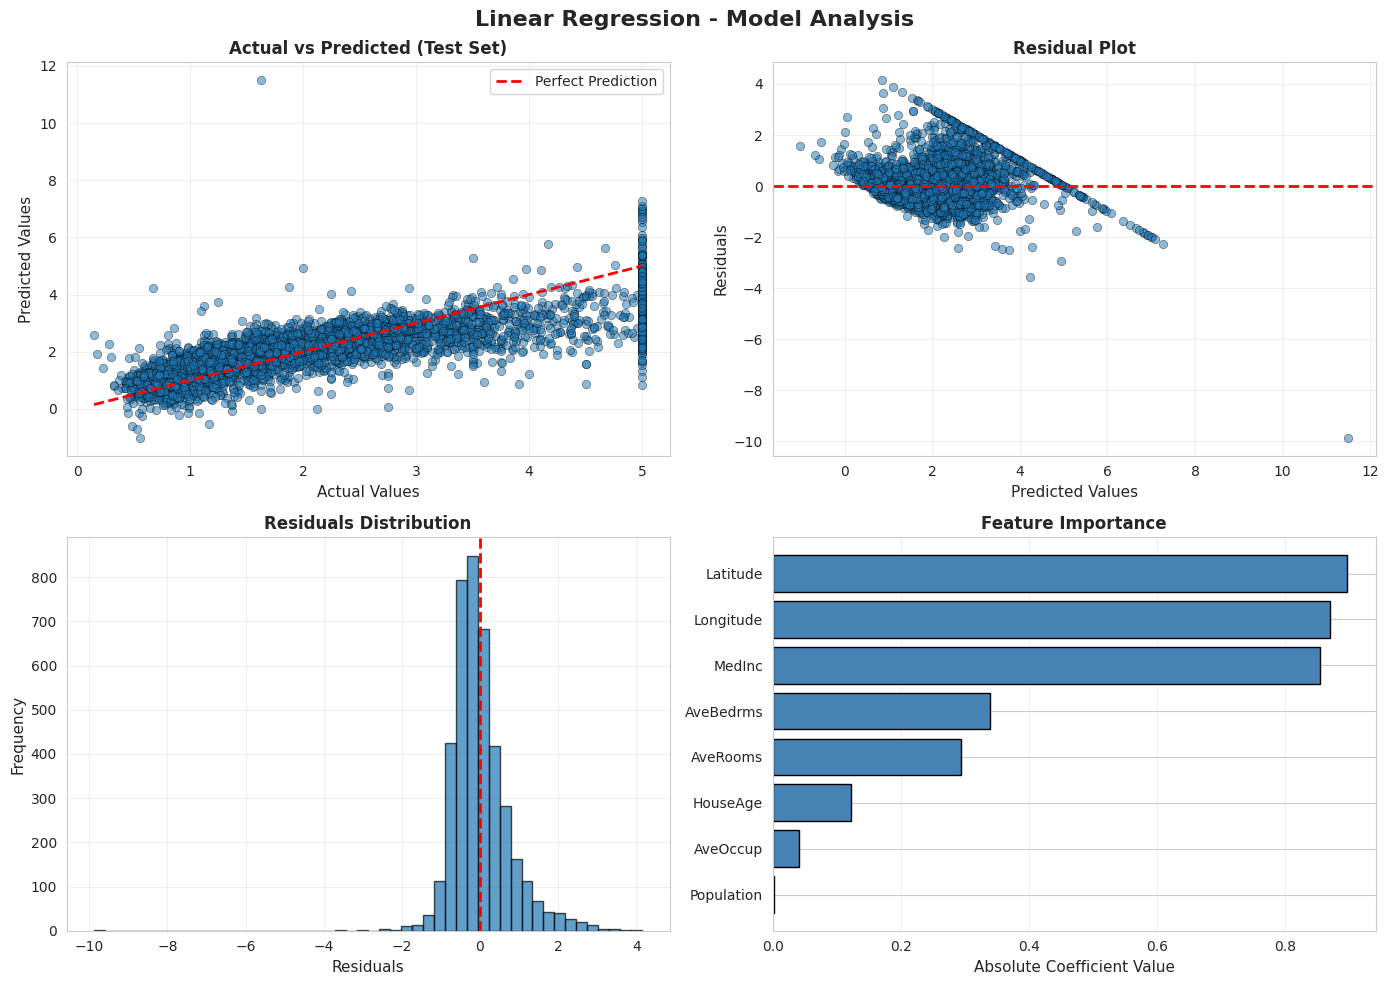

In [11]:
# ============================================
# VISUALIZATION
# ============================================
print("\n6. VISUALIZATIONS")
print("-" * 70)

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Linear Regression - Model Analysis', fontsize=16, fontweight='bold')

# Plot 1: Actual vs Predicted (Test Set)
axes[0, 0].scatter(y_test, y_test_pred, alpha=0.5, edgecolors='k', linewidth=0.5)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Values', fontsize=11)
axes[0, 0].set_ylabel('Predicted Values', fontsize=11)
axes[0, 0].set_title('Actual vs Predicted (Test Set)', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Residuals Plot
residuals = y_test - y_test_pred
axes[0, 1].scatter(y_test_pred, residuals, alpha=0.5, edgecolors='k', linewidth=0.5)
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted Values', fontsize=11)
axes[0, 1].set_ylabel('Residuals', fontsize=11)
axes[0, 1].set_title('Residual Plot', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Residuals Distribution
axes[1, 0].hist(residuals, bins=50, edgecolor='black', alpha=0.7)
axes[1, 0].axvline(x=0, color='r', linestyle='--', lw=2)
axes[1, 0].set_xlabel('Residuals', fontsize=11)
axes[1, 0].set_ylabel('Frequency', fontsize=11)
axes[1, 0].set_title('Residuals Distribution', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Feature Importance (Absolute Coefficients)
coef_abs = np.abs(model.coef_)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': coef_abs
}).sort_values('Importance', ascending=True)

axes[1, 1].barh(feature_importance['Feature'], feature_importance['Importance'],
                color='steelblue', edgecolor='black')
axes[1, 1].set_xlabel('Absolute Coefficient Value', fontsize=11)
axes[1, 1].set_title('Feature Importance', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('linear_regression_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Visualizations saved as 'linear_regression_analysis.png'")

In [12]:
# ============================================
# SUMMARY AND INSIGHTS
# ============================================
print("\n7. SUMMARY")
print("=" * 70)
print("Linear Regression Model Summary:")
print(f"  • No regularization applied")
print(f"  • Number of features: {X.shape[1]}")
print(f"  • Test R² Score: {test_r2:.4f}")
print(f"  • Test RMSE: {test_rmse:.4f}")
print(f"  • Most important feature: {coef_df.iloc[0]['Feature']}")
print(f"\nKey Characteristics:")
print(f"  ✓ Simple and interpretable")
print(f"  ✓ Fast training and prediction")
print(f"  ✗ May overfit with many features")
print(f"  ✗ Sensitive to outliers")
print("=" * 70)


7. SUMMARY
Linear Regression Model Summary:
  • No regularization applied
  • Number of features: 8
  • Test R² Score: 0.5758
  • Test RMSE: 0.7456
  • Most important feature: Latitude

Key Characteristics:
  ✓ Simple and interpretable
  ✓ Fast training and prediction
  ✗ May overfit with many features
  ✗ Sensitive to outliers
